# Xibc analysis
This notebook presents all study on Xibc decay to LbK. 
As a model I will use xgboost. 

Study roadmap
------

1. Grab MC signal and real data from the NTuple.  
2. Separate real data to background and test subsets 
3. Print features distributions (comparison plots) 
4. Train BDT 
*  try to tune BDThyperparameters to obtain the possible best resuls (measeuread as a 
* Print BDT repsponse value for both MC and data
* to be continued
--------

In [1]:
print("Kernel is alive!")

Kernel is alive!


In [64]:
import root_numpy
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import ROOT
import itertools
%matplotlib inline

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

#sklearn imports 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.externals import joblib

## The very first step is to grab data from NTuple. 

I take as a signal MC data and as a background wrong sign data.  

Below filed contains all branches names. For the further analysis I will grab only a tiny part of then.

In [3]:
all_branches = ["Xb_ENDVERTEX_X",
"Xb_ENDVERTEX_Y",
"Xb_ENDVERTEX_Z",
"Xb_OWNPV_X",
"Xb_OWNPV_Y",
"Xb_OWNPV_Z",
"Xb_OWNPV_CHI2",
"Xb_OWNPV_NDOF",
"Xb_IP_OWNPV",
"Xb_IPCHI2_OWNPV",
"Xb_FD_OWNPV",
"Xb_FDCHI2_OWNPV",
"Xb_DIRA_OWNPV",
"Xb_P",
"Xb_PT",
"Xb_PE",
"Xb_PX",
"Xb_PY",
"Xb_PZ",
"Xb_M",
"Xb_LOKI_CHI2NDOF_LcConstr",
"Xb_LOKI_DIRA",
"Xb_LOKI_DTF_CTAU",
"Xb_LOKI_FDCHI2",
"Xb_LOKI_MASS_LcConstr",
"Xb_LOKI_VCHI2NDOF_LcConstr",
"Xb_TAU",
"Xb_L0Global_Dec",
"Xb_L0Global_TIS",
"Xb_L0Global_TOS",
"Xb_Hlt1Global_TIS",
"Xb_Hlt1Global_TOS",
"Xb_Hlt1Phys_Dec",
"Xb_Hlt1Phys_TIS",
"Xb_Hlt1Phys_TOS",
"Xb_Hlt2Global_Dec",
"Xb_Hlt2Global_TIS",
"Xb_Hlt2Global_TOS",
"Xb_Hlt2Phys_Dec",
"Xb_Hlt2Phys_TIS",
"Xb_Hlt2Phys_TOS",
"Xb_L0DiMuonDecision_Dec",
"Xb_L0DiMuonDecision_TIS",
"Xb_L0DiMuonDecision_TOS",
"Xb_L0HCALDecision_Dec",
"Xb_L0HCALDecision_TIS",
"Xb_L0HCALDecision_TOS",
"Xb_L0HadronDecision_Dec",
"Xb_L0HadronDecision_TIS",
"Xb_L0HadronDecision_TOS",
"Xb_L0MuonDecision_Dec",
"Xb_L0MuonDecision_TIS",
"Xb_L0MuonDecision_TOS",
"Xb_L0MuonHighDecision_Dec",
"Xb_L0MuonHighDecision_TIS",
"Xb_L0MuonHighDecision_TOS",
            
"Xc_ENDVERTEX_X",
"Xc_ENDVERTEX_Y",
"Xc_ENDVERTEX_Z",
"Xc_ENDVERTEX_CHI2",
"Xc_ENDVERTEX_NDOF",
"Xc_OWNPV_X",
"Xc_OWNPV_Y",
"Xc_OWNPV_Z",
"Xc_OWNPV_CHI2",
"Xc_OWNPV_NDOF",
"Xc_IPCHI2_OWNPV",
"Xc_FD_OWNPV",
"Xc_FDCHI2_OWNPV",
"Xc_DIRA_OWNPV",
"Xc_ORIVX_X",
"Xc_ORIVX_Y",
"Xc_ORIVX_Z",
"Xc_ORIVX_CHI2",
"Xc_ORIVX_NDOF",
"Xc_FD_ORIVX",
"Xc_FDCHI2_ORIVX",
"Xc_DIRA_ORIVX",
"Xc_P",
"Xc_PT",
"Xc_PE",
"Xc_PX",
"Xc_PY",
"Xc_PZ",
"Xc_M",
"Xc_ID",
"Xc_TAU",
            
"p_MC12TuneV2_ProbNNe",
"p_MC12TuneV2_ProbNNmu",
"p_MC12TuneV2_ProbNNpi",
"p_MC12TuneV2_ProbNNk",
"p_MC12TuneV2_ProbNNp",
"p_MC12TuneV2_ProbNNghost",
"p_MC12TuneV3_ProbNNe",
"p_MC12TuneV3_ProbNNmu",
"p_MC12TuneV3_ProbNNpi",
"p_MC12TuneV3_ProbNNk",
"p_MC12TuneV3_ProbNNp",
"p_MC12TuneV3_ProbNNghost",
"p_OWNPV_X",
"p_OWNPV_Y",
"p_OWNPV_Z",
"p_OWNPV_CHI2",
"p_OWNPV_NDOF",
"p_IP_OWNPV",
"p_IPCHI2_OWNPV",
"p_ORIVX_X",
"p_ORIVX_Y",
"p_ORIVX_Z",
"p_ORIVX_CHI2",
"p_ORIVX_NDOF",
"p_P",
"p_PT",
"p_PE",
"p_PX",
"p_PY",
"p_PZ",
"p_M",
"p_PIDe",
"p_PIDmu",
"p_PIDK",
"p_PIDp",
"p_ProbNNe",
"p_ProbNNk",
"p_ProbNNp",
"p_ProbNNpi",
"p_ProbNNmu",
"p_ProbNNghost",
"p_hasMuon",
"p_isMuon",
"p_hasRich",
"p_hasCalo",
"k_MC12TuneV2_ProbNNe",
"k_MC12TuneV2_ProbNNmu",
"k_MC12TuneV2_ProbNNpi",
"k_MC12TuneV2_ProbNNk",
"k_MC12TuneV2_ProbNNp",
"k_MC12TuneV2_ProbNNghost",
"k_MC12TuneV3_ProbNNe",
"k_MC12TuneV3_ProbNNmu",
"k_MC12TuneV3_ProbNNpi",
"k_MC12TuneV3_ProbNNk",
"k_MC12TuneV3_ProbNNp",
"k_MC12TuneV3_ProbNNghost",
"k_OWNPV_X",
"k_OWNPV_Y",
"k_OWNPV_Z",
"k_OWNPV_CHI2",
"k_OWNPV_NDOF",
"k_IP_OWNPV",
"k_IPCHI2_OWNPV",
"k_ORIVX_X",
"k_ORIVX_Y",
"k_ORIVX_Z",
"k_ORIVX_CHI2",
"k_ORIVX_NDOF",
"k_P",
"k_PT",
"k_PE",
"k_PX",
"k_PY",
"k_PZ",
"k_M",
"k_ID",
"k_PIDe",
"k_PIDmu",
"k_PIDK",
"k_PIDp",
"k_ProbNNe",
"k_ProbNNk",
"k_ProbNNp",
"k_ProbNNpi",
"k_ProbNNmu",
"k_ProbNNghost",
"k_hasMuon",
"k_isMuon",
"k_hasRich",
"k_hasCalo",
"pi_MC12TuneV2_ProbNNe",
"pi_MC12TuneV2_ProbNNmu",
"pi_MC12TuneV2_ProbNNpi",
"pi_MC12TuneV2_ProbNNk",
"pi_MC12TuneV2_ProbNNp",
"pi_MC12TuneV2_ProbNNghost",
"pi_MC12TuneV3_ProbNNe",
"pi_MC12TuneV3_ProbNNmu",
"pi_MC12TuneV3_ProbNNpi",
"pi_MC12TuneV3_ProbNNk",
"pi_MC12TuneV3_ProbNNp",
"pi_MC12TuneV3_ProbNNghost",
"pi_OWNPV_X",
"pi_OWNPV_Y",
"pi_OWNPV_Z",
"pi_OWNPV_XERR",
"pi_OWNPV_YERR",
"pi_OWNPV_ZERR",
"pi_OWNPV_CHI2",
"pi_OWNPV_NDOF",
"pi_IP_OWNPV",
"pi_IPCHI2_OWNPV",
"pi_ORIVX_X",
"pi_ORIVX_Y",
"pi_ORIVX_Z",
"pi_ORIVX_CHI2",
"pi_ORIVX_NDOF",
"pi_P",
"pi_PT",
"pi_PE",
"pi_PX",
"pi_PY",
"pi_PZ",
"pi_M",
"pi_ProbNNe",
"pi_ProbNNk",
"pi_ProbNNp",
"pi_ProbNNpi",
"pi_ProbNNmu",
"pi_ProbNNghost",
"pi_hasMuon",
"pi_isMuon",
"pi_hasRich",
"pi_hasCalo",
"XcK_MC12TuneV2_ProbNNe",
"XcK_MC12TuneV2_ProbNNmu",
"XcK_MC12TuneV2_ProbNNpi",
"XcK_MC12TuneV2_ProbNNk",
"XcK_MC12TuneV2_ProbNNp",
"XcK_MC12TuneV2_ProbNNghost",
"XcK_MC12TuneV3_ProbNNe",
"XcK_MC12TuneV3_ProbNNmu",
"XcK_MC12TuneV3_ProbNNpi",
"XcK_MC12TuneV3_ProbNNk",
"XcK_MC12TuneV3_ProbNNp",
"XcK_MC12TuneV3_ProbNNghost",
"XcK_OWNPV_X",
"XcK_OWNPV_Y",
"XcK_OWNPV_Z",
"XcK_OWNPV_CHI2",
"XcK_OWNPV_NDOF",
"XcK_IP_OWNPV",
"XcK_IPCHI2_OWNPV",
"XcK_ORIVX_X",
"XcK_ORIVX_Y",
"XcK_ORIVX_Z",
"XcK_ORIVX_CHI2",
"XcK_ORIVX_NDOF",
"XcK_P",
"XcK_PT",
"XcK_PE",
"XcK_PX",
"XcK_PY",
"XcK_PZ",
"XcK_M",
"XcK_ID",
"XcK_PIDe",
"XcK_PIDmu",
"XcK_PIDK",
"XcK_PIDp",
"XcK_ProbNNe",
"XcK_ProbNNk",
"XcK_ProbNNp",
"XcK_ProbNNpi",
"XcK_ProbNNmu",
"XcK_ProbNNghost",
"XcK_hasMuon",
"XcK_isMuon",
"XcK_hasRich",
"XcK_hasCalo"]

## List of branches, that could be important in the further studies

In [9]:
branches = ["Xb_IP_OWNPV",
            "Xb_P",
            "Xb_PT",
            "Xb_LOKI_CHI2NDOF_LcConstr",
            "Xb_LOKI_DIRA",
            "Xb_ENDVERTEX_CHI2",
            "Xb_ENDVERTEX_X",
            "Xb_ENDVERTEX_Y",
            "Xb_OWNPV_X",
            "Xb_OWNPV_Y",
            "Xb_M",
            
            "Xc_IP_OWNPV",
            "Xc_P",
            "Xc_PT",
            "Xc_DIRA_OWNPV",
            "Xc_ENDVERTEX_CHI2",
            "Xc_M",
            
            "p_MC12TuneV3_ProbNNp",
            "p_P",
            "p_PT",
 
            "k_MC12TuneV3_ProbNNk",
            "k_P",
            "k_PT",
            
            "pi_MC12TuneV3_ProbNNpi",
            "pi_P",
            "pi_PT",
            
            "XcK_MC12TuneV3_ProbNNk",
            "XcK_P",
            "XcK_PT",

            ]

In [5]:
! ls ../datasets/eos_data/mc

Xb2LbK_mcU.root  Xibc2lbK.root


In [10]:
root_file_mc = ROOT.TFile("../datasets/eos_data/mc/Xb2LbK_mcU.root")
root_file_mc.cd("MyXb0")
tree_signal = ROOT.gDirectory.Get("mytree")
signal_mc = pd.DataFrame(root_numpy.tree2array(tree_signal, branches=branches))
signal_mc["Label"] = True


root_file_data = ROOT.TFile("../datasets/eos_data/data/Xibc2LbK_2011D.root")
root_file_data.cd("MyXb0")
tree_data = ROOT.gDirectory.Get("mytree")
real_data = pd.DataFrame(root_numpy.tree2array(tree_data, branches=branches))

In [11]:
def transform_data(data):
    out = data
    out["radi"]=numpy.sqrt(numpy.power(data.Xb_ENDVERTEX_X-data.Xb_OWNPV_X,2)+numpy.power(data.Xb_ENDVERTEX_Y-data.Xb_OWNPV_Y,2))
    out=out.drop(["Xb_ENDVERTEX_X", "Xb_OWNPV_X","Xb_ENDVERTEX_Y", "Xb_OWNPV_Y" ], axis=1).astype(numpy.float64)
    return out

In [12]:
signal_mc = transform_data(signal_mc)
signal_mc.tail()

,Xb_IP_OWNPV,Xb_P,Xb_PT,Xb_LOKI_CHI2NDOF_LcConstr,Xb_LOKI_DIRA,Xb_ENDVERTEX_CHI2,Xb_M,Xc_IP_OWNPV,Xc_P,Xc_PT,...,k_P,k_PT,pi_MC12TuneV3_ProbNNpi,pi_P,pi_PT,XcK_MC12TuneV3_ProbNNk,XcK_P,XcK_PT,Label,radi
2726,0.010912,180776.942953,10312.372652,0.334856,0.999999,0.065401,6890.931152,0.395052,41917.600594,1620.378053,...,11428.476619,250.086531,0.923276,10347.065705,499.957108,0.510250,138930.116225,9588.180277,1,0.443688
2727,0.016963,178056.616731,10479.065445,1.737135,0.999998,3.705468,6244.654297,0.311323,39186.099874,1253.375731,...,11428.476619,250.086531,0.995939,7618.996018,254.028458,0.510250,138930.116225,9588.180277,1,0.460090
2728,0.006750,119437.811751,14319.552460,0.930583,0.999995,0.500060,6829.182617,0.109286,55734.146576,9494.283415,...,10863.878645,2130.629205,0.999737,5473.996060,642.915957,0.950973,63873.382051,4967.823533,1,0.263860
2729,0.020707,103480.465319,12884.646464,1.610175,0.999986,0.002400,6915.185547,0.247042,48141.187102,8796.518237,...,9101.759468,1603.656638,0.991180,20250.089419,4115.333362,0.985207,55512.540776,4327.855840,1,0.484415
2730,0.017416,72911.626010,8157.945387,1.690245,0.999973,0.063833,6892.305176,0.144124,44208.515513,4905.487220,...,13331.064029,1823.577551,0.998110,14591.064102,1868.744182,0.997685,28962.053937,5067.031906,1,0.257525


In [13]:
real_data = transform_data(real_data)
real_data.tail()

,Xb_IP_OWNPV,Xb_P,Xb_PT,Xb_LOKI_CHI2NDOF_LcConstr,Xb_LOKI_DIRA,Xb_ENDVERTEX_CHI2,Xb_M,Xc_IP_OWNPV,Xc_P,Xc_PT,...,k_MC12TuneV3_ProbNNk,k_P,k_PT,pi_MC12TuneV3_ProbNNpi,pi_P,pi_PT,XcK_MC12TuneV3_ProbNNk,XcK_P,XcK_PT,radi
109462,0.047608,190938.827431,9223.746172,5.306525,0.999997,7.628954,6892.785645,0.134469,179582.338738,10127.543174,...,0.152047,80947.014656,4210.592923,0.964050,54526.979876,3388.360649,0.759365,11457.423144,914.854521,0.894553
109463,0.007896,176206.729258,27534.937568,2.188278,0.999999,1.001912,5488.369629,0.173644,96293.431236,16994.875985,...,0.920999,19674.592822,4037.935662,0.996049,8380.560020,1504.489947,0.438097,79903.406835,10619.683337,1.228521
109464,0.008547,167007.643295,30374.097802,4.438321,1.000000,1.472161,5844.385254,0.836372,36019.117249,7674.767419,...,0.698455,10405.371718,1950.998386,0.989356,12809.989645,3189.413625,0.568191,131023.569591,22726.793094,4.297517
109465,0.027733,67555.111627,9439.771929,1.250933,0.999997,0.150478,5601.329590,0.452767,51619.227232,7561.206340,...,0.889334,17341.694958,2543.323128,0.996543,15906.005897,2207.986537,0.996875,16110.247390,2989.309943,1.663726
109466,0.014385,146000.914250,8266.214510,15.947953,0.999983,0.038217,6314.634277,0.141552,38250.054190,4027.098398,...,0.917822,15674.088310,2290.205208,0.992803,7397.342366,652.483300,0.207615,107821.934562,4424.161110,0.133466


### Print histograms

At the begining of my study I will focus on presentation of the data.   
This is very important step. I need to know how data looks, what features can be usefull etc. 

In [17]:
def print_features_histograms(features, histogramName):
    hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
    # create the figure
    fig = plt.figure(figsize=(16,  25))
    fig.suptitle(histogramName, fontsize=20)
    for n, feature in enumerate(features):
        # add sub plot on our figure
        ax = fig.add_subplot(features.shape[1] // 5 + 1, 6, n + 1)
        # define range for histograms by cutting 1% of data from both ends
        min_value, max_value = numpy.percentile(features[feature], [1, 99])
        ax.hist(features[feature].values, range=(min_value, max_value), 
                 label='data', **hist_params)
        ax.legend(loc='best')

        ax.set_title(feature)

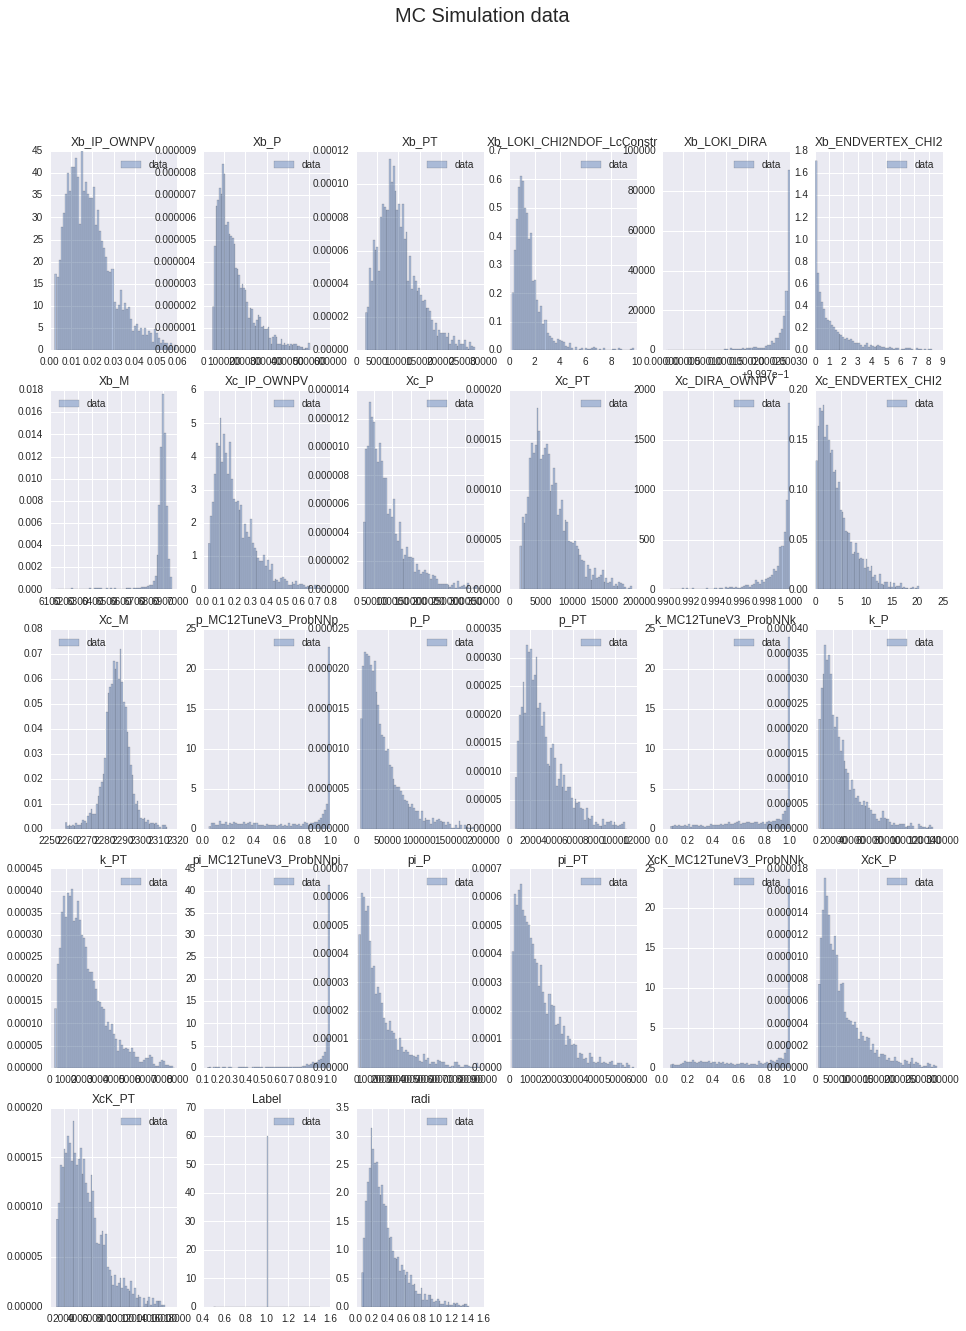

In [66]:
print_features_histograms(signal_mc,"MC Simulation data")

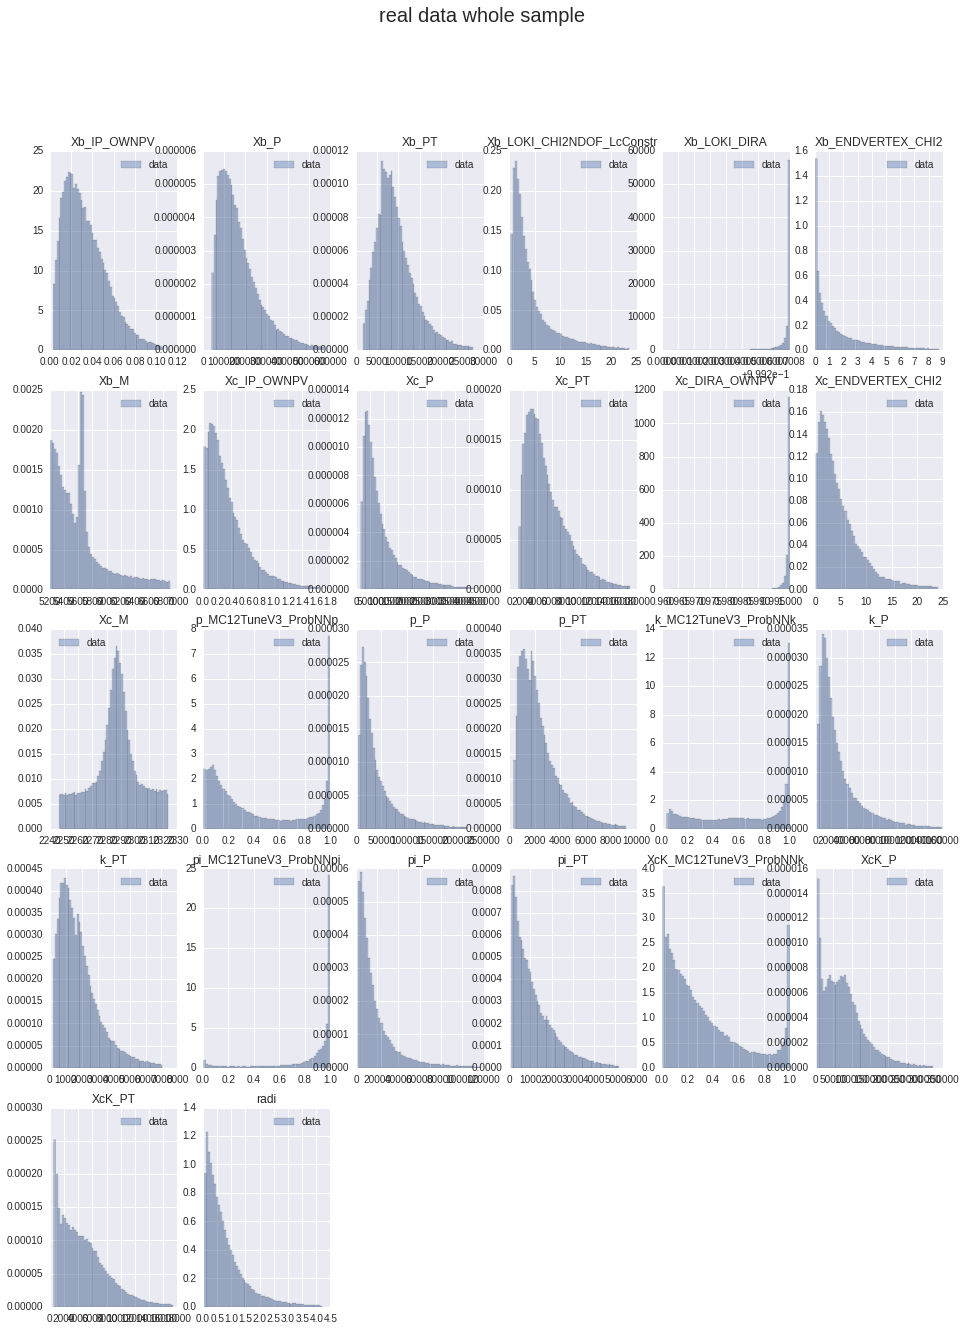

In [67]:
print_features_histograms(real_data,"real data whole sample")

## Separate real data into background and signal. 

In [15]:
xic_mass = 2286
mass_window=10
backgorund_data = real_data[numpy.abs(real_data.Xc_M-xic_mass)>mass_window]
backgorund_data["Label"]=False
signal_data = real_data[numpy.abs(real_data.Xc_M-xic_mass)<mass_window]
signal_data["Label"]=True

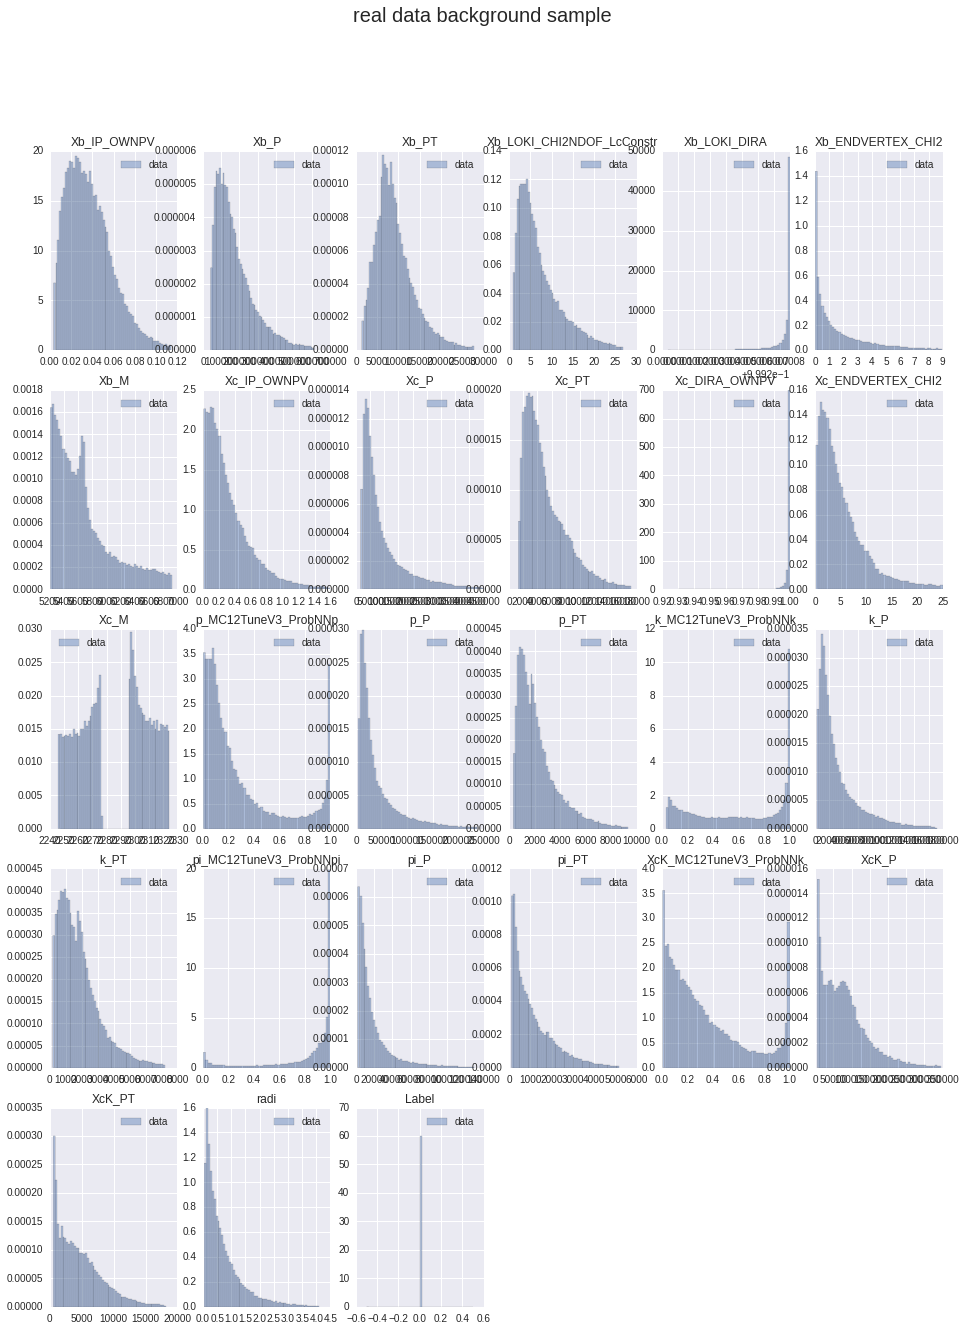

In [18]:
print_features_histograms(backgorund_data,"real data background sample")

## Make comparison plots for background vs MC and signal vs MC

In [70]:
def comparison_plot(data_1, data_2, name_1, name_2):
    hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
    # create the figure
    fig = plt.figure(figsize=(16,  25))
    for n, feature in enumerate(data_1):
        # add sub plot on our figure
        ax = fig.add_subplot(data_1.shape[1] // 5 + 1, 6, n + 1)
        # define range for histograms by cutting 1% of data from both ends
        min_value, max_value = numpy.percentile(data_1[feature], [1, 99])
        ax.hist(data_1[feature].values, range=(min_value, max_value), 
                 label=name_1, **hist_params)
        ax.hist(data_2[feature].values, range=(min_value, max_value), 
                 label=name_2, **hist_params)
        ax.legend(loc='best')

        ax.set_title(feature)

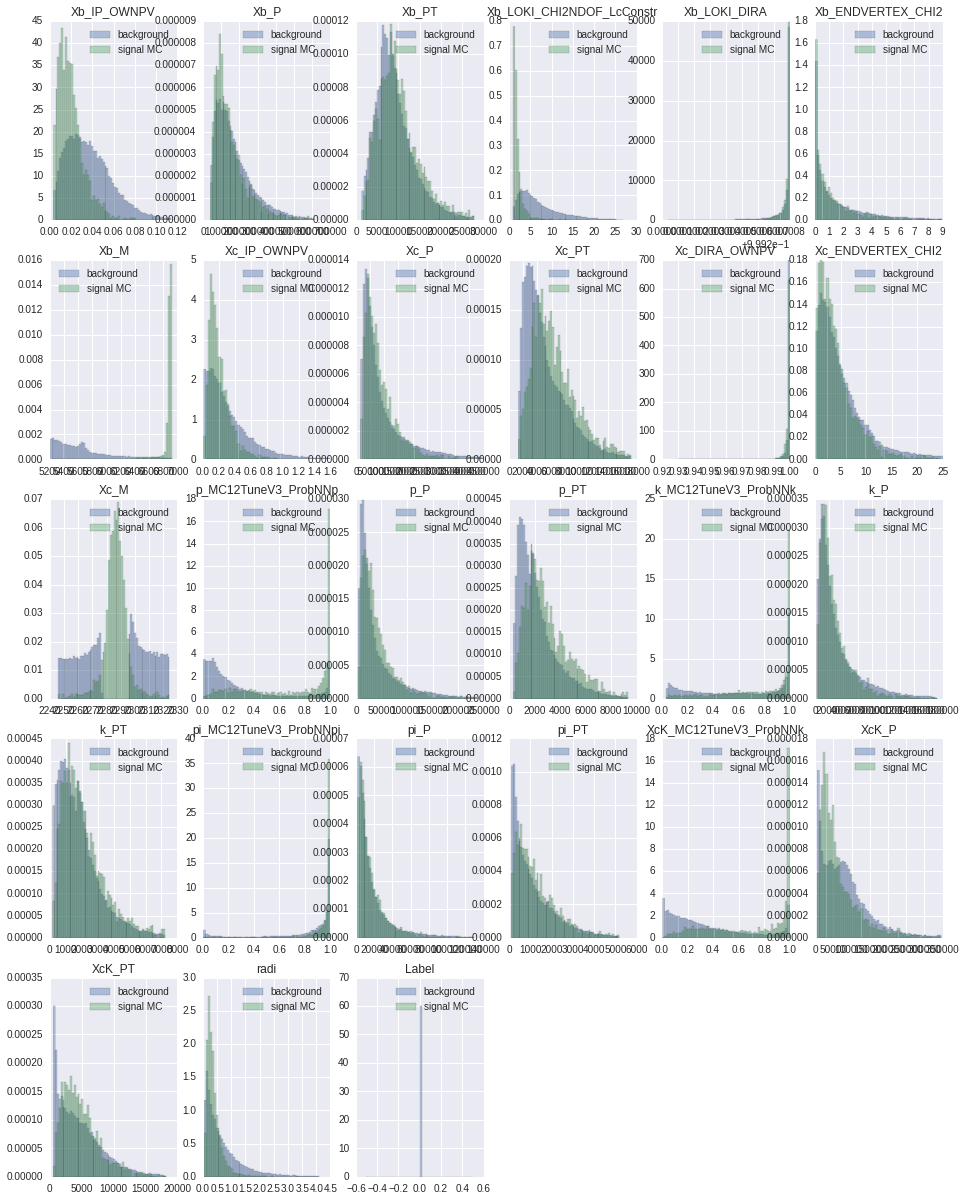

In [71]:
comparison_plot(backgorund_data,signal_mc,"background","signal MC")

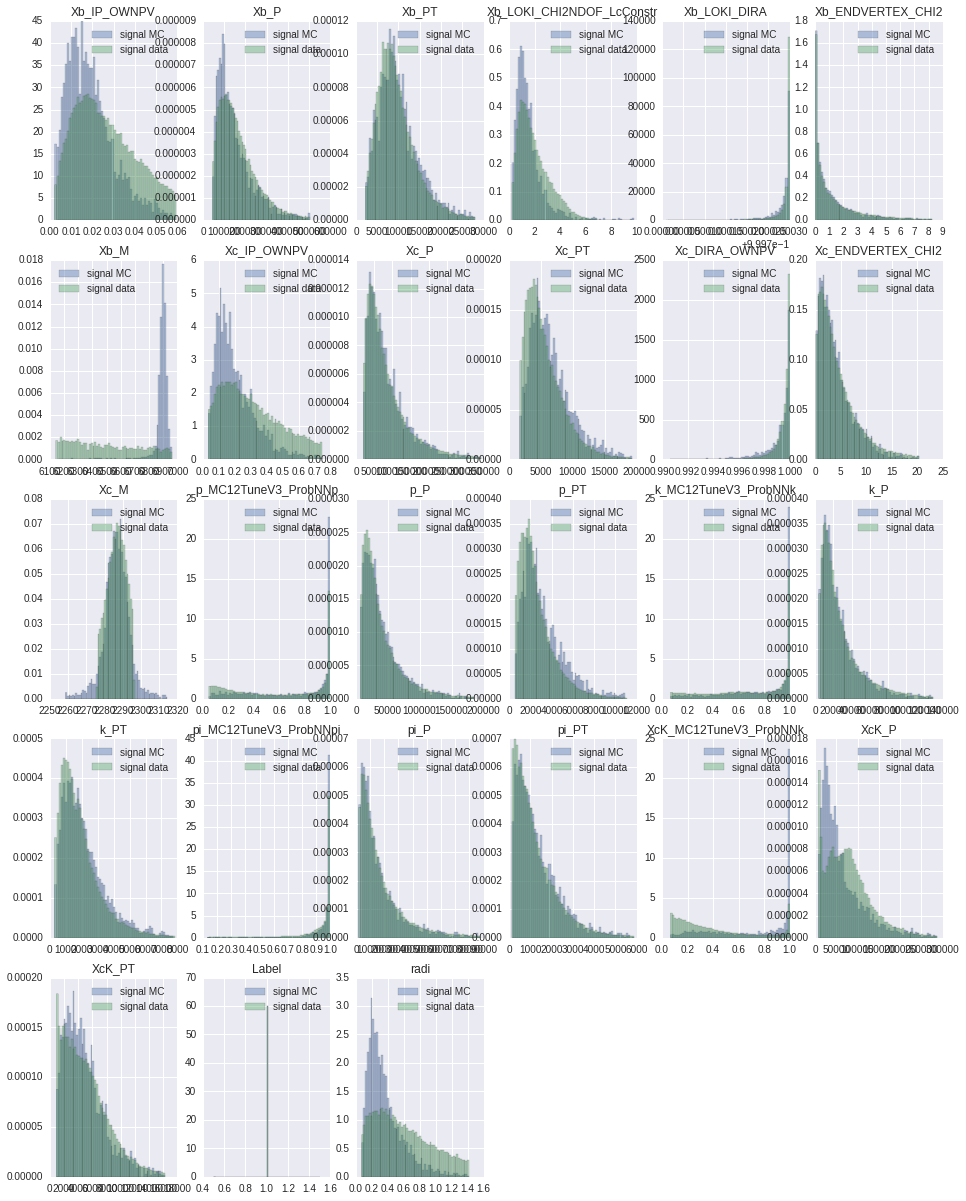

In [72]:
comparison_plot(signal_mc,signal_data,"signal MC","signal data")

## Train BDT 
I wil use BDT configuration from the previous study

In [19]:
mc_sample = signal_mc.count()[0]
backgrund_sample = backgorund_data.count()[0]
print ("mc_sample "+str(mc_sample))
print ("backgrund_sample "+str(backgrund_sample))
print ("ratio "+str(float(mc_sample)/backgrund_sample))

mc_sample 2731
backgrund_sample 53916
ratio 0.0506528674234


So our dataset is highly imbalanced. We need to deal with it! 


In [20]:
trainig_data = pd.concat([signal_mc,backgorund_data])
trainig_data = trainig_data.drop(["Xc_M","Xb_M"], axis=1).astype(numpy.float64)
target = trainig_data.Label
trainig_features = trainig_data.drop(["Label"], axis=1).astype(numpy.float64)

In [77]:
trainX, testX, trainY, testY = train_test_split(trainig_features, target, random_state=42,train_size=0.8 )

sample_weight = numpy.ones(trainX.count()[0])
sample_weight[numpy.where(trainY == 1)] *= 20

gb = GradientBoostingClassifier( n_estimators=600, learning_rate=0.2, max_depth=6 ,verbose =3)

gb.fit(trainX,trainY, sample_weight=sample_weight )

      Iter       Train Loss   Remaining Time 
         1           1.1048            8.51m
         2           0.9122            8.16m
         3           0.7703            7.91m
         4           0.6654            8.11m
         5           0.5792            7.96m
         6           0.5114            7.81m
         7           0.4571            7.72m
         8           0.4133            7.64m
         9           0.3758            7.64m
        10           0.3466            7.60m
        11           0.3197            7.55m
        12           0.2976            7.50m
        13           0.2771            7.45m
        14           0.2620            7.41m
        15           0.2483            7.42m
        16           0.2355            7.38m
        17           0.2230            7.42m
        18           0.2108            7.40m
        19           0.1994            7.37m
        20           0.1911            7.36m
        21           0.1826            7.34m
        2

GradientBoostingClassifier(init=None, learning_rate=0.2, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              random_state=None, subsample=1.0, verbose=3,
              warm_start=False)

In [84]:
from sklearn.metrics import classification_report
target_names = ['background', "signal"]
print("classification raport test")
print(classification_report(testY, gb.predict(testX), target_names=target_names))

classification raport test
             precision    recall  f1-score   support

 background       0.99      0.99      0.99     10792
     signal       0.90      0.86      0.88       538

avg / total       0.99      0.99      0.99     11330



In [79]:
print "ROC AUC score"
roc_auc_score(testY, gb.predict_proba(testX)[:, 1])

ROC AUC score


0.99256385013268822

In [80]:
print "precision score"
precision_score(testY, gb.predict(testX))

precision score


0.89575289575289574

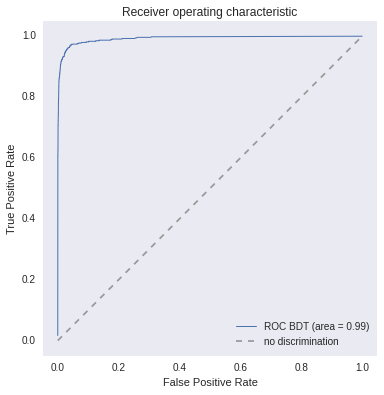

In [81]:
plt.figure(figsize=[6, 6])
fpr, tpr, thresholds = roc_curve(testY, gb.predict_proba(testX)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC BDT (area = %0.2f)'%(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='no discrimination')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10738    54]
 [   74   464]]


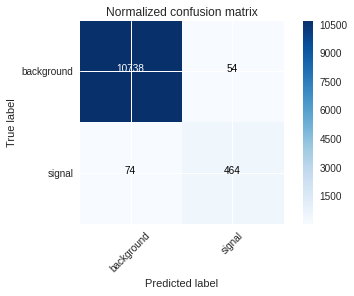

In [82]:
cnf_matrix = confusion_matrix(testY ,gb.predict(testX));
target_names = ["background","signal"]
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Normalized confusion matrix')

## Features importance 
Often features do not contribute equally to predict the target response. I want to know what is the strength of some particular features. It can be useful with further features engineering step.

In [74]:
def print_feature_importance(model, features):
    importances = model.feature_importances_
    std = numpy.std([model.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = numpy.argsort(importances)[::-1]
    features_names =  list(features.columns.values)

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(features.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, features_names[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(features.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(features.shape[1]), features_names, rotation=70)
    plt.xlim([-1, features.shape[1]])
    plt.show()

Feature ranking:
1. feature Xb_ENDVERTEX_CHI2 (0.134792)
2. feature Xb_IP_OWNPV (0.070269)
3. feature Xb_LOKI_CHI2NDOF_LcConstr (0.070009)
4. feature Xb_LOKI_DIRA (0.055845)
5. feature Xb_P (0.053600)
6. feature Xb_PT (0.051356)
7. feature XcK_MC12TuneV3_ProbNNk (0.043137)
8. feature XcK_P (0.041403)
9. feature XcK_PT (0.039032)
10. feature Xc_DIRA_OWNPV (0.037742)
11. feature Xc_ENDVERTEX_CHI2 (0.035216)
12. feature Xc_IP_OWNPV (0.033869)
13. feature Xc_P (0.033821)
14. feature Xc_PT (0.032419)
15. feature k_MC12TuneV3_ProbNNk (0.032223)
16. feature k_P (0.032035)
17. feature k_PT (0.025987)
18. feature p_MC12TuneV3_ProbNNp (0.025356)
19. feature p_P (0.023805)
20. feature p_PT (0.020284)
21. feature pi_MC12TuneV3_ProbNNpi (0.018580)
22. feature pi_P (0.018234)
23. feature pi_PT (0.016476)
24. feature radi (0.016177)


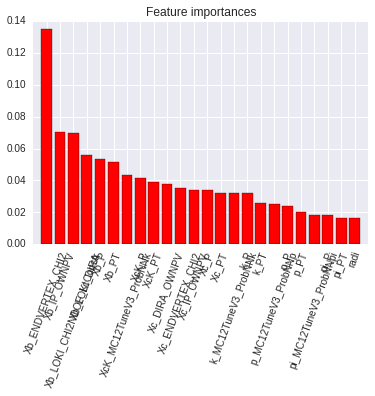

In [83]:
print_feature_importance(gb, trainig_features)

## Check the  classifier output value

In [55]:
signal_mc_to_bdt = signal_mc.drop(["Xc_M","Xb_M","Label"], axis=1).astype(numpy.float64)
mc_scores = gb.predict_proba(signal_mc_to_bdt)[:,1]
signal_data_to_bdt = signal_data.drop(["Xc_M","Xb_M","Label"], axis=1).astype(numpy.float64)
data_signal_scores = gb.predict_proba(signal_data_to_bdt)[:,1]

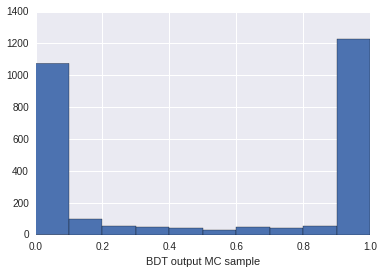

In [85]:
plt.figure()
plt.hist(mc_scores)
plt.xlabel('BDT output MC sample')
plt.show()

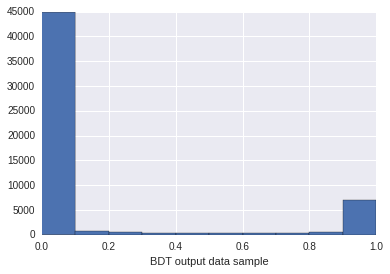

In [58]:
plt.figure()
plt.hist(data_signal_scores)
plt.xlabel('BDT output data sample')
plt.show()

# Tune model hyperparameters

Due to high imbalance of the dataset I decided to use precision as an ordered metric.
Now I try to tune of the hyperparameters.   
The issue i to keep as much signal events as possible! 

My tuning apprach is based on [this notebook](http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/gbm-tutorial.ipynb)

In [102]:
gb_grid_params = {'learning_rate': [0.3, 0.1, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = GradientBoostingClassifier(n_estimators = 400)

clf = grid_search.GridSearchCV(gb_gs,
                               gb_grid_params,
                               cv=4,
                               scoring='precision',
                               fit_params={'sample_weight': sample_weight},
                               verbose = 3, 
                               n_jobs=10);
clf.fit(trainX, trainY)

{'learning_rate': [0.3, 0.1, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=20 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=20 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=20 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=20 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50 .............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100 ............
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100 ............
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, score=0.875000 - 6.3min
[CV] learning_rate=0.3, max_depth=4, min_samp

[Parallel(n_jobs=10)]: Done   1 jobs       | elapsed:  6.5min


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, score=0.871609 - 6.5min
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=150 ............
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=20, score=0.867384 - 6.6min
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=150 ............
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, score=0.903922 - 6.6min
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=20 .............
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, score=0.862888 - 6.8min
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=20 .............
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=20, score=0.846715 - 6.8min
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=20 .............
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, score=0.849023 - 6.9min
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=20 .............
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=20, score=0.886719 

[Parallel(n_jobs=10)]: Done  32 jobs       | elapsed: 22.7min


[CV]  learning_rate=0.3, max_depth=8, min_samples_leaf=50, score=0.863813 - 4.6min
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=20 .............
[CV]  learning_rate=0.3, max_depth=8, min_samples_leaf=100, score=0.889764 - 3.6min
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=20 .............
[CV]  learning_rate=0.3, max_depth=8, min_samples_leaf=100, score=0.893661 - 3.9min
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=20 .............
[CV]  learning_rate=0.3, max_depth=8, min_samples_leaf=100, score=0.891221 - 3.8min
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50 .............
[CV]  learning_rate=0.3, max_depth=8, min_samples_leaf=100, score=0.876712 - 3.9min
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50 .............
[CV]  learning_rate=0.3, max_depth=8, min_samples_leaf=150, score=0.877670 - 3.9min
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50 .............
[CV]  learning_rate=0.3, max_depth=8, min_samples_leaf=150, score=0.912

[Parallel(n_jobs=10)]: Done 144 out of 144 | elapsed: 101.8min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={'sample_weight': array([ 1.,  1., ...,  1.,  1.])},
       iid=True, loss_func=None, n_jobs=10,
       param_grid={'learning_rate': [0.3, 0.1, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='precision', verbose=3)

In [103]:
print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
        % (mean_score, scores.std() * 2, params))

Best parameters set found on development set:
{'learning_rate': 0.3, 'max_depth': 6, 'min_samples_leaf': 100}
Grid scores on development set:
0.863 (+/-0.029) for {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 20}
0.868 (+/-0.012) for {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 50}
0.877 (+/-0.041) for {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 100}
0.870 (+/-0.027) for {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 150}
0.886 (+/-0.014) for {'learning_rate': 0.3, 'max_depth': 6, 'min_samples_leaf': 20}
0.892 (+/-0.031) for {'learning_rate': 0.3, 'max_depth': 6, 'min_samples_leaf': 50}
0.894 (+/-0.013) for {'learning_rate': 0.3, 'max_depth': 6, 'min_samples_leaf': 100}
0.893 (+/-0.024) for {'learning_rate': 0.3, 'max_depth': 6, 'min_samples_leaf': 150}
0.872 (+/-0.025) for {'learning_rate': 0.3, 'max_depth': 8, 'min_samples_leaf': 20}
0.882 (+/-0.021) for {'learning_rate': 0.3, 'max_depth': 8, 'min_samples_leaf': 50}
0.888 (+/-0.01

In [106]:
gb = GradientBoostingClassifier( n_estimators=600, learning_rate=0.3, max_depth=6, min_samples_leaf=100 ,verbose =3)

gb.fit(trainX,trainY, sample_weight=sample_weight )

      Iter       Train Loss   Remaining Time 
         1           0.9936            8.41m
         2           0.7696            7.63m
         3           0.6214            7.46m
         4           0.5197            7.37m
         5           0.4480            7.26m
         6           0.3939            7.26m
         7           0.3526            7.33m
         8           0.3223            7.25m
         9           0.2923            7.19m
        10           0.2716            7.14m
        11           0.2520            7.10m
        12           0.2354            7.07m
        13           0.2230            7.02m
        14           0.2078            7.01m
        15           0.1950            6.99m
        16           0.1839            6.95m
        17           0.1756            6.91m
        18           0.1629            6.90m
        19           0.1553            6.87m
        20           0.1496            6.85m
        21           0.1428            6.84m
        2

GradientBoostingClassifier(init=None, learning_rate=0.3, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              random_state=None, subsample=1.0, verbose=3,
              warm_start=False)

In [107]:
from sklearn.metrics import classification_report
target_names = ['background', "signal"]
print("classification raport test")
print(classification_report(testY, gb.predict(testX), target_names=target_names))

classification raport test
             precision    recall  f1-score   support

 background       0.99      1.00      0.99     10792
     signal       0.91      0.86      0.88       538

avg / total       0.99      0.99      0.99     11330



Confusion matrix, without normalization
[[10744    48]
 [   74   464]]


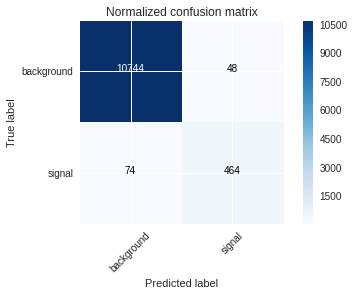

In [108]:
cnf_matrix = confusion_matrix(testY ,gb.predict(testX));
target_names = ["background","signal"]
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Normalized confusion matrix')